#                                                       **Lung Cancer Prediction**

![](http://)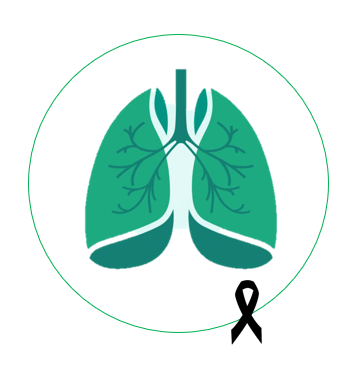

# Steps 
* Data Lookup & Cleaning
* Data Visualization
* Data Conversion, Balanacing and Scaling 
* Creation of Model 
* Prediction of Test set 
* Accuracy 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv


In [2]:
df=pd.read_csv('../input/lung-cancer/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Data Lookup & Cleaning

In [3]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
# Shape of Data 
df.shape

(309, 16)

In [5]:
# Determining null data 
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
df['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

**This is not a balanced data set**

In [7]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


## Data Visualization

In [9]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


<AxesSubplot:ylabel='None'>

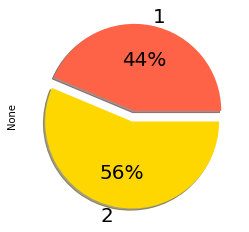

In [10]:
df.groupby('SMOKING').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%',explode=[0.05,0.075],shadow=True,
                                  colors=['tomato', 'gold', 'skyblue'])

<AxesSubplot:ylabel='None'>

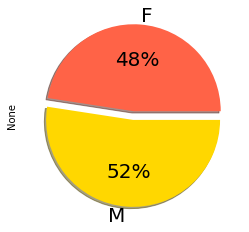

In [11]:
df.groupby('GENDER').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%',explode=[0.05,0.05],shadow=True,
                                  colors=['tomato', 'gold', 'skyblue'])

<AxesSubplot:ylabel='None'>

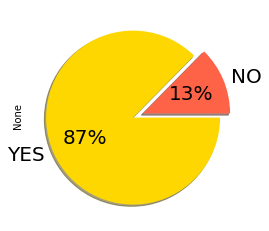

In [12]:
df.groupby('LUNG_CANCER').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%',explode=[0.05,0.075],shadow=True,
                                  colors=['tomato', 'gold', 'skyblue'])

Total no. of attributes:16 No .of instances:284 Attribute information: 1. Gender: M(male), F(female) 2. Age: Age of the patient 3. Smoking: YES=2 , NO=1. 4. Yellow fingers: YES=2 , NO=1. 5. Anxiety: YES=2 , NO=1. 6. Peer_pressure: YES=2 , NO=1. 7. Chronic Disease: YES=2 , NO=1. 8. Fatigue: YES=2 , NO=1. 9. Allergy: YES=2 , NO=1. 10. Wheezing: YES=2 , NO=1. 11. Alcohol: YES=2 , NO=1. 12. Coughing: YES=2 , NO=1. 13. Shortness of Breath: YES=2 , NO=1. 14. Swallowing Difficulty: YES=2 , NO=1. 15. Chest pain: YES=2 , NO=1. 16. Lung Cancer: YES , NO.

In [13]:
# Converting non numeric values to numeric values 

df['GENDER'] = df['GENDER'].map({'F': 0, 'M': 1})

df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<AxesSubplot:ylabel='None'>

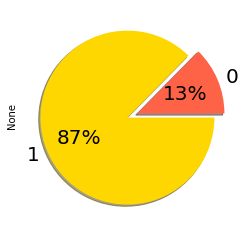

In [14]:
# To understand the Balance of the Data
df.groupby('LUNG_CANCER').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%',explode=[0.05,0.075],shadow=True,
                                  colors=['tomato', 'gold', 'skyblue'])

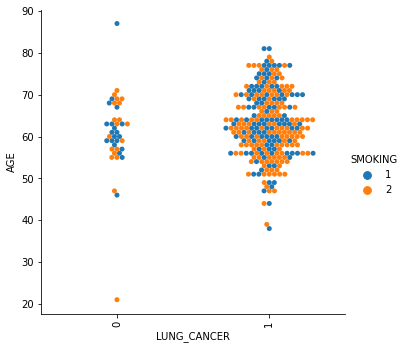

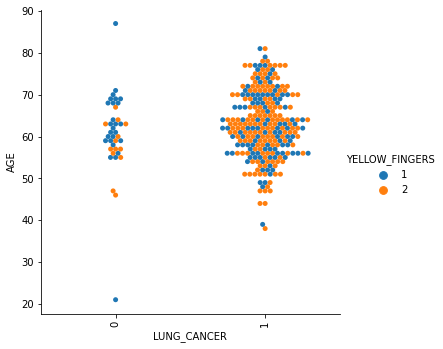

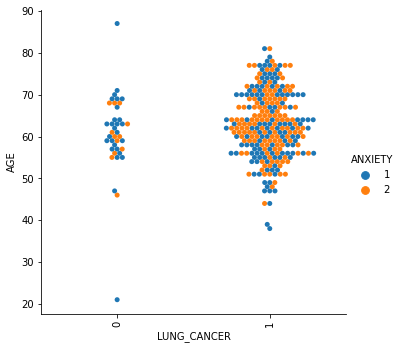

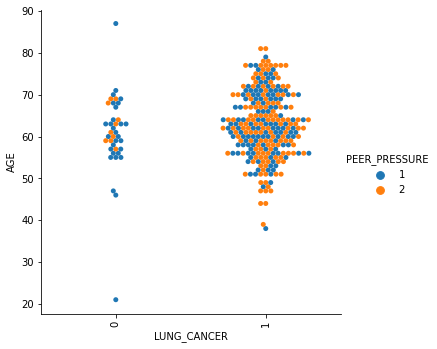

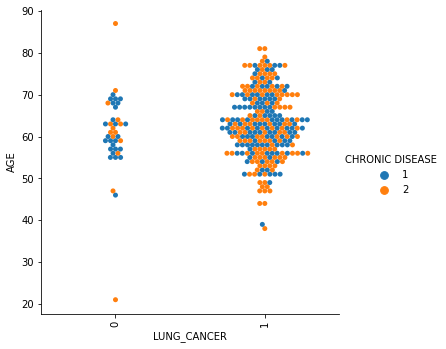

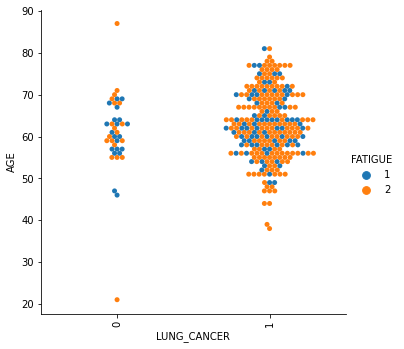

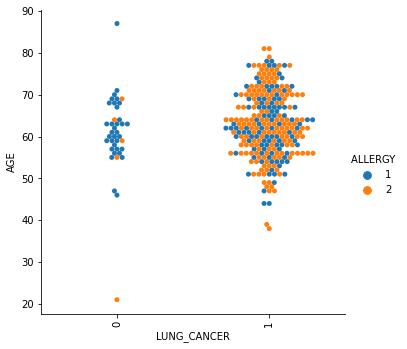

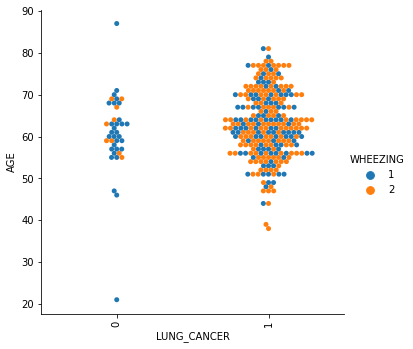

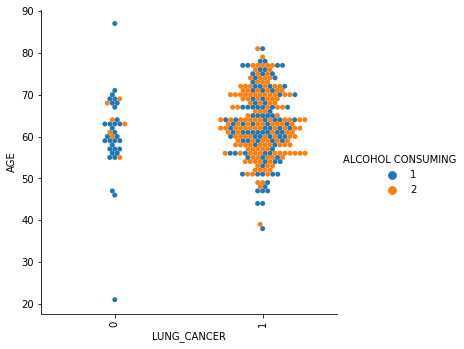

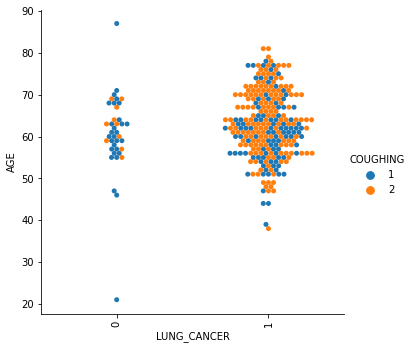

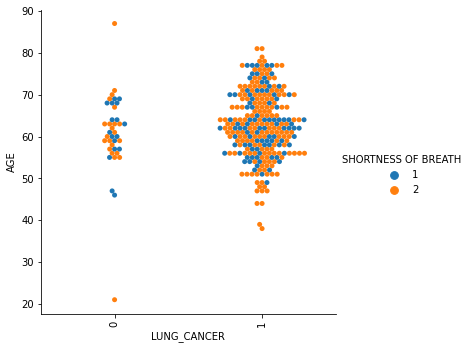

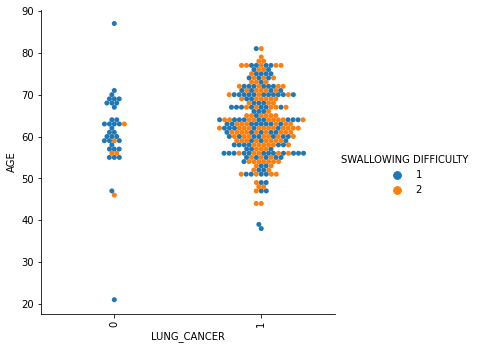

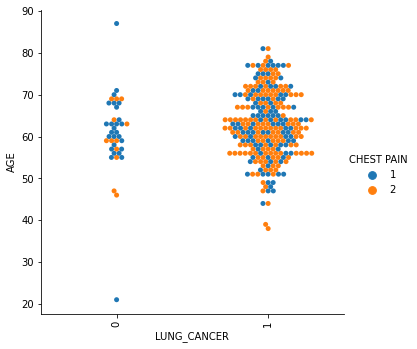

In [15]:
col=[ 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
for i in col:
    sns.catplot(x="LUNG_CANCER", y="AGE", hue=i,kind="swarm",data=df)
    plt.xticks(rotation=90)
    plt.show()


In [16]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

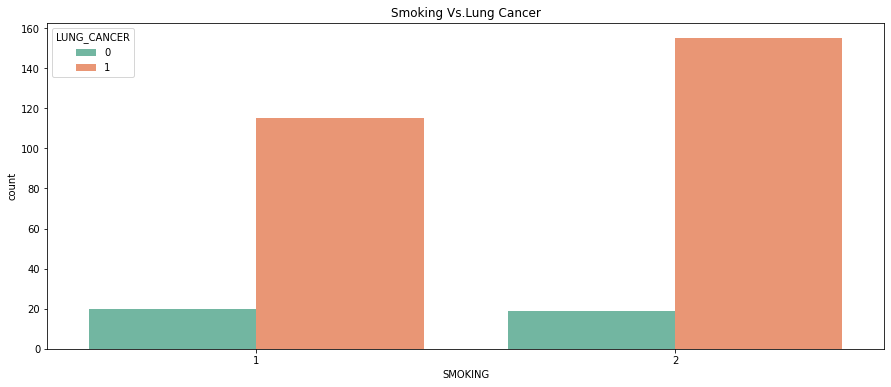

In [17]:
# Smoking vs Lung Cancer
plt.figure(figsize=(15,6))
sns.countplot('SMOKING', data=df, hue = 'LUNG_CANCER',palette = 'Set2')
# sns.barplot(x='SMOKING', y='LUNG_CANCER', palette="rocket", data=dfs)

plt.title("Smoking Vs.Lung Cancer")
plt.show()

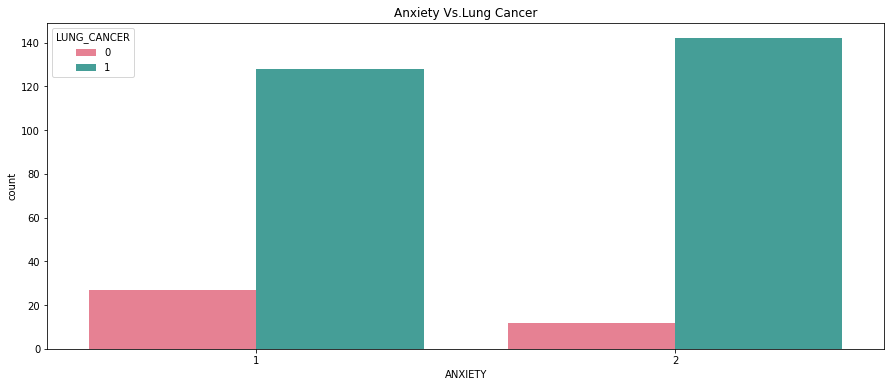

In [18]:
# Anxiety vs Lung Cancer
plt.figure(figsize=(15,6))
sns.countplot('ANXIETY', data=df, hue = 'LUNG_CANCER',palette = "husl")
plt.title("Anxiety Vs.Lung Cancer")
plt.show()

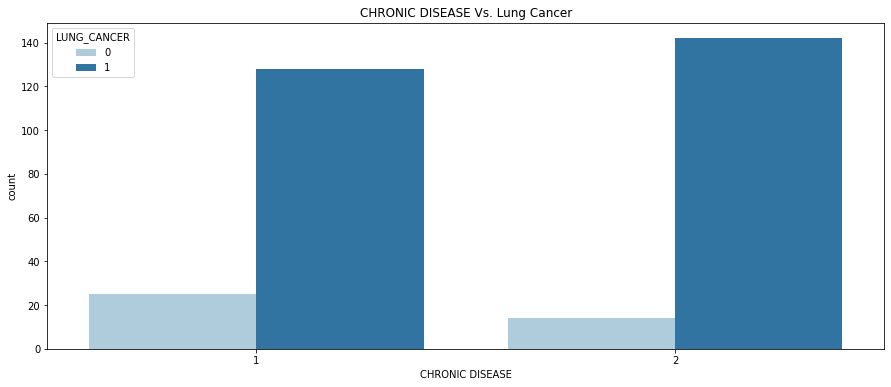

In [19]:
# CHRONIC DISEASE vs Lung Cancer
plt.figure(figsize=(15,6))
sns.countplot('CHRONIC DISEASE', data=df, hue = 'LUNG_CANCER',palette = "Paired")
plt.title("CHRONIC DISEASE Vs. Lung Cancer")
plt.show()

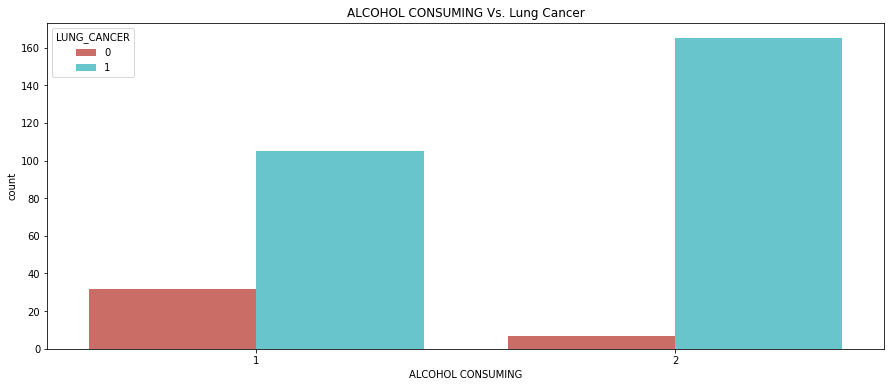

In [20]:
# ALCOHOL CONSUMING vs Lung Cancer
plt.figure(figsize=(15,6))
sns.countplot('ALCOHOL CONSUMING', data=df, hue = 'LUNG_CANCER',palette = "hls")
plt.title("ALCOHOL CONSUMING Vs. Lung Cancer")
plt.show()

## Data Conversion, Balancing and Scaling

### Data Conversion

In [21]:
# As there are attributes that are not numerical , they must be converted into numerical 
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### Data Scaling 

In [22]:

# scale numeric variables 

scaler=MinMaxScaler()

# list of only numeric var
num_vars=['AGE']

# 2. Fit on data
df[num_vars]=scaler.fit_transform(df[num_vars])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.727273,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,0.803030,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,0.575758,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,0.636364,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,0.636364,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [23]:
#Finding Correlation
cn=df.corr()
cn

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


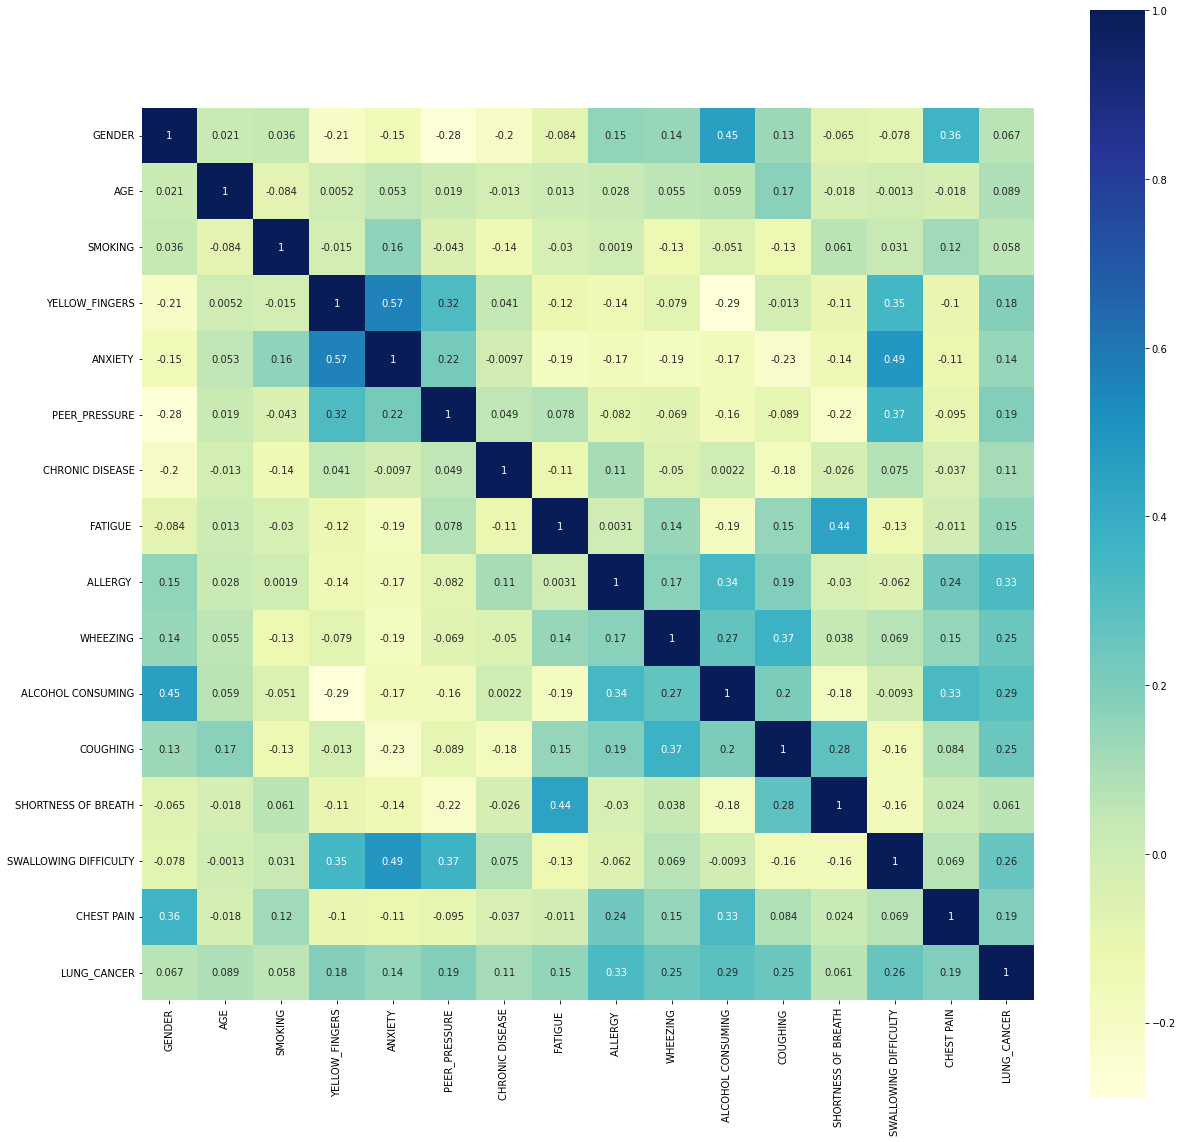

In [24]:
#HeatMap
plt.subplots(figsize=(20,20))
sns.heatmap(cn,cmap="YlGnBu",annot=True, square=True)
plt.show()

In [25]:
df['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [26]:
# Removing the Control column
X=df.drop('LUNG_CANCER', axis = 1)
y=df['LUNG_CANCER']
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0.727273,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,0.803030,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,0.575758,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,0.636364,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,0.636364,1,2,1,1,1,1,1,2,1,2,2,1,1


### Balancing Data 

In [27]:
# Balancing the data 

from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = over_samp.fit_resample(X, y)
X_train_ros.shape, y_train_ros.shape

((540, 15), (540,))

## Creation of Model

In [28]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_train_ros, y_train_ros, test_size = 0.3, random_state = 42)

In [29]:
# Checking Train and Test
print(X_train.shape)
print(X_test.shape)


(378, 15)
(162, 15)


In [30]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Prediction

In [31]:
#Predicting result using testing data
y_pred= model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0])

In [32]:
#Comparing predicted values with the actual values
value=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
value.head()

,Actual Value,Predicted Value
229,1,1
73,1,0
521,0,0
86,1,1
469,0,0


## Accuracy

In [33]:
#Model accuracy
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(y_test, y_pred)
accuracy

0.9074074074074074

# Overall Accuracy = 90%